In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import statistics as stat

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('../input/student-performance-data/student_data.csv')
df = df.dropna()
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
y1 = df['G1']
y2 = df['G2']
y3 = df['G3']
ytot = y1 + y2 + y3
y = ytot / 58

<AxesSubplot:xlabel='absences'>

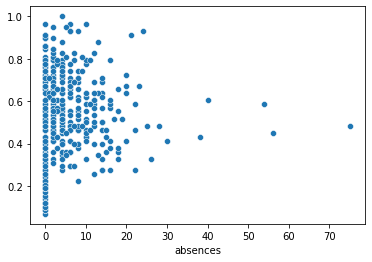

In [8]:
sns.scatterplot(x = df['absences'], y = y)

In [13]:
X = df.drop(columns = ['G1', 'G2', 'G3'])
X.columns
X.head()
XH = X

In [14]:
"""ALL CATS: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']"""
cats = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
#XNoCats = X.drop(columns = cats)
#XNoCats.head()

In [15]:
#ONEHOTENC TEST
transformer = make_column_transformer(
    (OneHotEncoder(), cats),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
XH = transformed_df
XH.head()

,onehotencoder__school_GP,onehotencoder__school_MS,onehotencoder__sex_F,onehotencoder__sex_M,onehotencoder__address_R,onehotencoder__address_U,onehotencoder__famsize_GT3,onehotencoder__famsize_LE3,onehotencoder__Pstatus_A,onehotencoder__Pstatus_T,...,remainder__famrel,remainder__freetime,remainder__goout,remainder__Dalc,remainder__Walc,remainder__health,remainder__absences,remainder__G1,remainder__G2,remainder__G3
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0


In [115]:
%%time

N = tf.keras.layers.Normalization()
N.adapt(np.array(XH))
linear_model = tf.keras.Sequential([
    N,
    layers.Dense(units=5, activation = 'softmax')
])
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002),
    loss='mean_absolute_error')

CPU times: user 250 ms, sys: 5.84 ms, total: 256 ms
Wall time: 255 ms


In [117]:
%%time
history = linear_model.fit(
    XH,
    y,
    epochs=100,
    # Suppress logging.
    verbose=2,
    # Calculate validation results on 10% of the training data.
    validation_split = 0.1)

Epoch 1/100
12/12 - 0s - loss: 0.3892 - val_loss: 0.3709
Epoch 2/100
12/12 - 0s - loss: 0.3892 - val_loss: 0.3709
Epoch 3/100
12/12 - 0s - loss: 0.3892 - val_loss: 0.3709
Epoch 4/100
12/12 - 0s - loss: 0.3891 - val_loss: 0.3709
Epoch 5/100
12/12 - 0s - loss: 0.3891 - val_loss: 0.3708
Epoch 6/100
12/12 - 0s - loss: 0.3890 - val_loss: 0.3708
Epoch 7/100
12/12 - 0s - loss: 0.3890 - val_loss: 0.3708
Epoch 8/100
12/12 - 0s - loss: 0.3889 - val_loss: 0.3708
Epoch 9/100
12/12 - 0s - loss: 0.3889 - val_loss: 0.3707
Epoch 10/100
12/12 - 0s - loss: 0.3888 - val_loss: 0.3707
Epoch 11/100
12/12 - 0s - loss: 0.3888 - val_loss: 0.3707
Epoch 12/100
12/12 - 0s - loss: 0.3887 - val_loss: 0.3706
Epoch 13/100
12/12 - 0s - loss: 0.3887 - val_loss: 0.3706
Epoch 14/100
12/12 - 0s - loss: 0.3886 - val_loss: 0.3706
Epoch 15/100
12/12 - 0s - loss: 0.3886 - val_loss: 0.3706
Epoch 16/100
12/12 - 0s - loss: 0.3886 - val_loss: 0.3705
Epoch 17/100
12/12 - 0s - loss: 0.3885 - val_loss: 0.3705
Epoch 18/100
12/12 - 0s

In [118]:
linear_model.evaluate(
    XH, y, verbose=1)

13/13 [==============================] - 0s 1ms/step - loss: 0.3833


0.383299320936203

In [119]:
linear_model.save('MDL4')
MDL4 = tf.keras.models.load_model('MDL4')

In [74]:
linear_model.save('MDL3')
MDL = tf.keras.models.load_model('MDL3')

In [75]:
MDL.evaluate(
    XH, y, batch_size=None, verbose=0)

0.14091210067272186

In [125]:
#If it doesn't work well --> high bias. Check last entries for high variance
predModel =  MDL4.predict(X)
print("FIRST 20")
for i in range(20):
    pred = round(predModel[i][0] * 58)
    yi = round(y[i] * 58)
    dif = round(abs(yi-pred))
    print(f"Actual: {yi}, Pred: {pred}, Diff: {dif}")
print("LAST 20")
for i in range(len(X)-20, len(X)):
    pred = round(predModel[i][0] * 58)
    yi = round(y[i] * 58)
    dif = round(abs(yi-pred))
    print(f"Actual: {yi}, Pred: {pred}, Diff: {dif}")

FIRST 20
Actual: 17, Pred: 1, Diff: 16
Actual: 16, Pred: 23, Diff: 7
Actual: 25, Pred: 23, Diff: 2
Actual: 44, Pred: 16, Diff: 28
Actual: 26, Pred: 26, Diff: 0
Actual: 45, Pred: 12, Diff: 33
Actual: 35, Pred: 9, Diff: 26
Actual: 17, Pred: 1, Diff: 16
Actual: 53, Pred: 0, Diff: 53
Actual: 44, Pred: 13, Diff: 31
Actual: 27, Pred: 19, Diff: 8
Actual: 34, Pred: 19, Diff: 15
Actual: 42, Pred: 9, Diff: 33
Actual: 31, Pred: 6, Diff: 25
Actual: 46, Pred: 1, Diff: 45
Actual: 42, Pred: 10, Diff: 32
Actual: 41, Pred: 13, Diff: 28
Actual: 28, Pred: 18, Diff: 10
Actual: 16, Pred: 1, Diff: 15
Actual: 28, Pred: 11, Diff: 17
LAST 20
Actual: 26, Pred: 2, Diff: 24
Actual: 44, Pred: 4, Diff: 40
Actual: 27, Pred: 6, Diff: 21
Actual: 45, Pred: 2, Diff: 43
Actual: 30, Pred: 18, Diff: 12
Actual: 43, Pred: 9, Diff: 34
Actual: 20, Pred: 12, Diff: 8
Actual: 32, Pred: 5, Diff: 27
Actual: 11, Pred: 4, Diff: 7
Actual: 16, Pred: 3, Diff: 13
Actual: 29, Pred: 8, Diff: 21
Actual: 17, Pred: 7, Diff: 10
Actual: 12, Pre